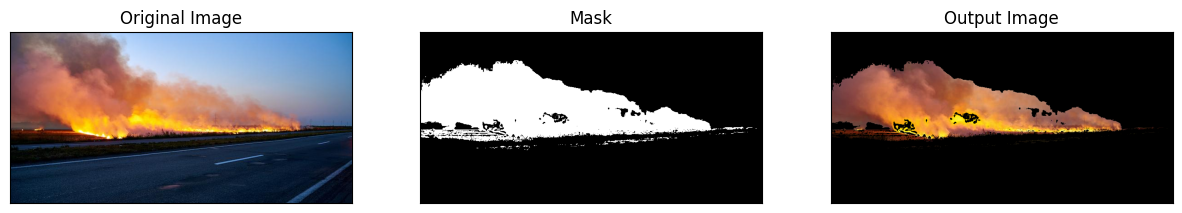

In [10]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'fire.jpg', cv2.IMREAD_COLOR)

# Convert image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert image to HSV and split the image
h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
eq_v = cv2.equalizeHist(v)

# merging
eq_img = cv2.merge([h, s, eq_v])

# Thresholding : value = 200
ret, thres = cv2.threshold(eq_img, 200, 255, cv2.THRESH_BINARY_INV)

# Create two masks
mask1 = cv2.inRange(eq_img, (0,100,20), (30,250,255))
mask2 = cv2.inRange(eq_img, (170,100,20), (180,250,255))

# Make a single mask using mask 1 and 2
mask = cv2.bitwise_or(mask1, mask2)

# Apply the mask to the image
output = cv2.bitwise_and(eq_img, eq_img, mask=mask)

# Convert the image again from HSV to RGB
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

# Plotting
plt.figure(figsize=(15,15), num='test.img')

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img)
plt.xticks([]),plt.yticks([])

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask, cmap='Greys_r')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.title('Output Image')
plt.imshow(output)
plt.xticks([]), plt.yticks([])

plt.show()